In [134]:
import pandas as pd
import numpy as np
from tqdm import tqdm

from persiantools.jdatetime import JalaliDate

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

import arabic_reshaper
from bidi.algorithm import get_display

In [10]:
farsi_font = FontProperties(
    fname='../../report/styles/fonts/XB Niloofar.ttf')

farsi = lambda x: get_display(arabic_reshaper.reshape(str(x)))

---

In [3]:
data_df = pd.read_csv('../data/1k_refah_db_clean.zip')
data_df

,ID,ParentID,BirthDate,GenderId,postalcode,Provincename,countyname,isurban,AmCrdtr_95,Amdbtr_95,...,Cars_Count,CarsPrice_Sum,Trips_Count_AirNotPilgrimage,Trips_Count_NotAirNotPilgrimage,Trips_Count_AirPilgrimage,Trips_Count_NotAirPilgrimage,HasMojavezSenfi,Senf,HasBimeSalamat,BimeSalmat_Type
0,8520256269,7449267102,1985-09-08,1,335414.0,تهران,شهريار,True,125000000,92500000,...,0,0,0,0,0,0,0,NaN,1,بيمه سلامت همگاني
1,10457574042,10457574042,1985-03-21,1,316985.0,تهران,ملارد,False,400000000,400000000,...,0,0,0,0,0,0,0,NaN,0,NaN
2,12494345556,9774300678,2018-10-29,2,9417883.0,خراسان شمالي,بجنورد,False,0,0,...,0,0,0,0,0,0,0,NaN,0,NaN
3,4014326052,6733056921,2002-11-16,2,4617949.0,مازندران,آمل,True,25000000,30000000,...,0,0,0,0,0,0,0,NaN,0,NaN
4,8075316438,6263910690,2015-07-01,2,8897131.0,چهارمحال وبختياري,لردگان,True,2500000,2500000,...,0,0,0,0,0,0,0,NaN,1,بيمه سلامت همگاني
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28200,9892994694,9892994694,1986-12-31,1,6831933.0,لرستان,دلفان,True,275000000,275000000,...,1,855771499,0,0,0,0,0,NaN,0,NaN
28201,6237093738,8377263603,1970-10-24,2,514493.0,آذربايجان شرقي,تبريز,True,0,0,...,0,0,0,0,0,0,0,NaN,0,NaN
28202,10081771527,6085494270,2008-03-06,2,3754167.0,تهران,قدس,True,0,0,...,0,0,0,0,0,0,0,NaN,0,NaN
28203,2941478724,306509133,1970-07-23,2,6444133.0,خوزستان,دشت آزادگان,False,0,0,...,0,0,0,0,0,0,0,NaN,1,روستاييان


In [4]:
data_df['BirthDate'] = pd.to_datetime(data_df['BirthDate'])
data_df['JalaliBirth'] = data_df['BirthDate'].apply(lambda x: JalaliDate(x))

In [7]:
END_DATE = JalaliDate(1399, 6, 1)

age_calc = lambda x: np.round((END_DATE - x).days / 365.25, 1)
data_df['Age'] = data_df['JalaliBirth'].apply(age_calc)

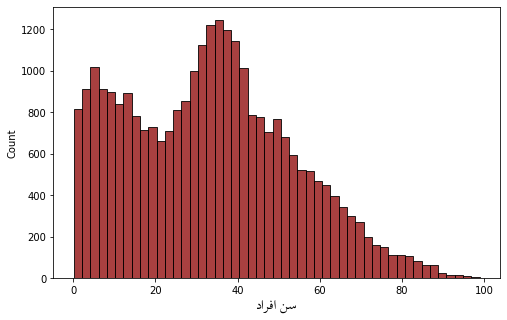

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data_df, x = 'Age', color='darkred')
plt.xlabel(farsi('سن افراد'), font=farsi_font, fontsize=14)
plt.savefig('../../report/figures/EDA/AgeHistogram.pdf')

In [21]:
data_df = data_df[['ID', 'ParentID', 'JalaliBirth', 'Age', 'GenderId', 'IsMalool', 'IsBiamrKhas']]
data_df

,ID,ParentID,JalaliBirth,Age,GenderId,IsMalool,IsBiamrKhas
0,8520256269,7449267102,1364-06-17,35.0,1,0,0
1,10457574042,10457574042,1364-01-01,35.4,1,0,0
2,12494345556,9774300678,1397-08-07,1.8,2,0,0
3,4014326052,6733056921,1381-08-25,17.8,2,0,0
4,8075316438,6263910690,1394-04-10,5.1,2,0,0
...,...,...,...,...,...,...,...
28200,9892994694,9892994694,1365-10-10,33.6,1,0,0
28201,6237093738,8377263603,1349-08-02,49.8,2,0,0
28202,10081771527,6085494270,1386-12-16,12.5,2,0,0
28203,2941478724,306509133,1349-05-01,50.1,2,0,0


In [23]:
data_df['SpecialCondition'] = (data_df['IsMalool'] + data_df['IsBiamrKhas']) > 0

<ipython-input-23-ed3d57c99bf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['SpecialCondition'] = (data_df['IsMalool'] + data_df['IsBiamrKhas']) > 0


In [24]:
data_df

,ID,ParentID,JalaliBirth,Age,GenderId,IsMalool,IsBiamrKhas,SpecialCondition
0,8520256269,7449267102,1364-06-17,35.0,1,0,0,False
1,10457574042,10457574042,1364-01-01,35.4,1,0,0,False
2,12494345556,9774300678,1397-08-07,1.8,2,0,0,False
3,4014326052,6733056921,1381-08-25,17.8,2,0,0,False
4,8075316438,6263910690,1394-04-10,5.1,2,0,0,False
...,...,...,...,...,...,...,...,...
28200,9892994694,9892994694,1365-10-10,33.6,1,0,0,False
28201,6237093738,8377263603,1349-08-02,49.8,2,0,0,False
28202,10081771527,6085494270,1386-12-16,12.5,2,0,0,False
28203,2941478724,306509133,1349-05-01,50.1,2,0,0,False


In [39]:
data_df['AgeGroup'] = pd.cut(
    data_df['Age'], 
    bins = (0, 2, 6, 12, 18, 30, 45, 60, np.inf),
    labels=range(8)
)

<ipython-input-39-85bb2ba765f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['AgeGroup'] = pd.cut(


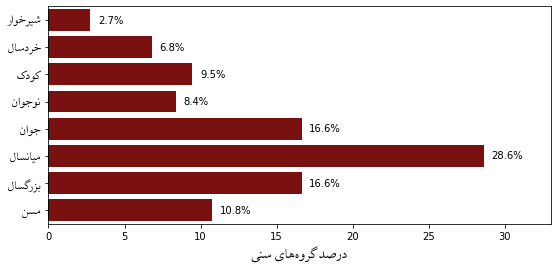

In [76]:
tmep_df = (data_df['AgeGroup'].value_counts() / len(data_df) * 100).reset_index()
tmep_df.sort_values('index', inplace=True)
labels = [
    "شیرخوار",
    "خردسال",
    "کودک",
    "نوجوان",
    "جوان",
    "میانسال",
    "بزرگسال",
    "مسن"
]
tmep_df['label'] = [farsi(i) for i in labels]

plt.figure(figsize=(9, 4))
ax = sns.barplot(data=tmep_df, x = 'AgeGroup', y ='label', color='darkred')
plt.yticks(font=farsi_font, fontsize=12)
plt.xlim((0, 33))
plt.ylabel('')
plt.xlabel(farsi('درصد گروه‌های سنی'), font=farsi_font, fontsize=14)
for p, val in zip(ax.patches, tmep_df['AgeGroup'].values):
    plt.text(p.get_width() + .5, p.get_y() + 0.5, f'{val:.1f}%')

plt.savefig('../../report/figures/EDA/AgeGroupRatio.pdf')

In [79]:
data_df['Gender'] = pd.cut(data_df['GenderId'], bins=[0, 1.5, 3], labels=['male', 'female'])

<ipython-input-79-4f7e3adc05b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Gender'] = pd.cut(data_df['GenderId'], bins=[0, 1.5, 3], labels=['male', 'female'])


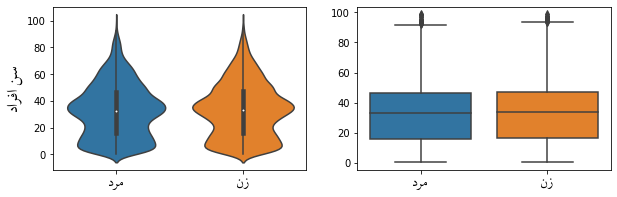

In [91]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

ax = ax1
sns.violinplot(data=data_df, y='Age', x='Gender', ax=ax)
ax.set_xlabel('')
ax.set_xticklabels(labels=[farsi('مرد'), farsi('زن')], font=farsi_font, fontsize=14)
ax.set_ylabel(farsi('سن افراد'), font=farsi_font, fontsize=16)

ax = ax2
sns.boxplot(data=data_df, y='Age', x='Gender', ax=ax)
ax.set_xlabel('')
ax.set_xticklabels(labels=[farsi('مرد'), farsi('زن')], font=farsi_font, fontsize=14)
ax.set_ylabel('')

plt.savefig('../../report/figures/EDA/AgeByGender.pdf')

In [94]:
temp_df = data_df.groupby(['ParentID', 'AgeGroup', 'Gender']).agg(count=('ID', 'count'))

In [101]:
temp_df = pd.pivot(
    temp_df.reset_index(), 
    index='ParentID', 
    columns=['AgeGroup', 'Gender'], 
    values='count'
)
temp_df

AgeGroup       0           1           2           3           4           5  \
Gender      male female male female male female male female male female male   
ParentID                                                                       
2626686        0      0    0      0    0      0    0      0    1      1    0   
4642533        1      0    0      0    0      0    0      1    0      0    1   
5970318        0      0    0      0    0      0    0      0    0      0    1   
8611005        0      0    0      1    0      0    0      0    0      0    1   
9035478        0      0    0      0    0      1    1      0    2      0    0   
...          ...    ...  ...    ...  ...    ...  ...    ...  ...    ...  ...   
12693002487    0      0    0      0    0      0    0      0    0      1    0   
12693196581    0      0    0      0    0      0    0      0    0      1    0   
12693238647    0      0    0      0    0      0    0      0    0      1    0   
12697606992    0      0    0      0    0      0    0      0    0      0    0   
12748866258    0      0    1      0    0      0    0      0    0      0    0   

AgeGroup              6           7         
Gender      female male female male female  
ParentID                                    
2626686          0    0      0    0      0  
4642533          0    0      0    0      0  
5970318          0    0      0    0      1  
8611005          1    0      0    0      0  
9035478          1    1      0    0      0  
...            ...  ...    ...  ...    ...  
12693002487      0    0      0    0      0  
12693196581      0    0      0    0      0  
12693238647      0    0      0    0      0  
12697606992      0    1      0    0      0  
12748866258      0    0      0    0      0  

[9473 rows x 16 columns]

In [136]:
temp_df.to_csv('../data/Features/FamilyAgeGender.zip', compression={
    'method': 'zip', 'archive_name': 'FamilyAgeGender.csv'
})

In [122]:
a = temp_df.values
fam_size = a.sum(axis=1)

In [123]:
a.shape

(9473, 16)

In [132]:
def get_similarity(i):
    i = i.reshape(1, -1)
    return np.abs(a - i).sum(axis=1) / ((fam_size + i.sum()) / 2)

In [137]:
similarity_matrix = np.array([get_similarity(i) for i in tqdm(a)])

100%|█████████████████████████████████████████████████████████████████████████████| 9473/9473 [00:11<00:00, 859.70it/s]


In [145]:
similarity_matrix.shape

(9473, 9473)

In [152]:
result_df = pd.DataFrame(np.triu(np.round(similarity_matrix, 2)), index=temp_df.index.values, columns=temp_df.index.values)
result_df

,2626686,4642533,5970318,8611005,9035478,9725262,11364360,11728440,12476649,13608618,...,12616970160,12617588235,12618232263,12692616021,12692951934,12693002487,12693196581,12693238647,12697606992,12748866258
2626686,0.0,2.0,2.0,2.00,1.50,2.00,1.20,0.40,2.00,2.00,...,2.0,0.67,2.0,0.67,2.00,0.67,0.67,0.67,2.00,2.0
4642533,0.0,0.0,1.2,1.33,2.00,2.00,2.00,2.00,1.43,1.33,...,1.2,2.00,2.0,2.00,2.00,2.00,2.00,2.00,2.00,2.0
5970318,0.0,0.0,0.0,1.20,2.00,2.00,2.00,2.00,1.33,1.20,...,2.0,2.00,2.0,2.00,2.00,2.00,2.00,2.00,2.00,2.0
8611005,0.0,0.0,0.0,0.00,1.56,2.00,2.00,2.00,0.29,0.67,...,1.2,2.00,2.0,2.00,1.00,2.00,2.00,2.00,2.00,2.0
9035478,0.0,0.0,0.0,0.00,0.00,1.11,1.56,1.56,1.60,1.11,...,1.5,1.43,2.0,2.00,1.43,2.00,2.00,2.00,1.43,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12693002487,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,2.00,2.0
12693196581,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,2.00,2.0
12693238647,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,2.00,2.0
12697606992,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,2.0


In [153]:
result_df.to_csv('../data/Matrix/FamilyAgeGender.zip', compression={
    'method': 'zip', 'archive_name': 'FamilyAgeGender.csv'
})